# **张雨澈**

In [ ]:
%matplotlib inline 
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


<!--%matplotlib inline
这是一行IPython魔法命令，用于在Jupyter Notebook或IPython环境中内联显示matplotlib
绘制的图形。这意味着图形将直接显示在代码单元格的下方，而不是在新的窗口中。
import tensorflow as tf导入TensorFlow库，并用tf作为别名。
TensorFlow是一个开源机器学习框架，常用于深度学习应用。
from tensorflow.keras.datasets import cifar10
从TensorFlow的Keras API中导入CIFAR-10数据集。CIFAR-10是一个包含60,000个32x32彩色图像的数据集，分为10个类别，每个类别有6,000个图像。
from tensorflow.keras.models import Sequential
从TensorFlow的Keras API中导入
Sequential模型类。Sequential模型是多个网络层的线性堆叠。
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
导入构建CNN模型所需的多个层。Conv2D: 二维卷积层，用于从输入中提取特征。-->

In [ ]:
# 加载CIFAR-10数据集
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [ ]:
# 数据归一化到[0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:
# 构建模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

<!--构建卷积神经网络模型：模型由一系列卷积层、池化层、Dropout层和全连接层组成，采用了Sequential模型的方式进行搭建。

Conv2D层：卷积层，使用3x3的卷积核，ReLU激活函数，padding='same'表示使用零填充，input_shape=(32, 32, 3)指定输入图像的大小为32x32，通道数为3。
MaxPooling2D层：最大池化层，使用2x2的池化窗口进行池化操作。
Dropout层：随机失活层，用于减少过拟合。
Flatten层：将多维数据展平成一维，以便传递给全连接层。
Dense层：全连接层，包括512个神经元和10个输出类别，采用softmax激活函数。-->

In [ ]:
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#使用Adam优化器，学习率为0.001，损失函数为稀疏分类交叉熵，评估指标为准确率。

In [ ]:
# 数据增强
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
#通过ImageDataGenerator对训练数据进行增强，包括随机旋转、平移和水平翻转等操作。train_datagen.flow(train_images, train_labels, batch_size=32)：
#生成用于训练的批量增强数据。

In [ ]:
# 训练模型
history = model.fit(train_generator,
                    steps_per_epoch=len(train_images) // 32,
                    epochs=10, # 你可以根据需要调整epoch数量
                    validation_data=(test_images, test_labels),
                    validation_steps=len(test_images) // 32)


In [ ]:
# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
#使用测试集数据对模型进行评估，计算测试集上的损失和准确率。

In [ ]:
# 绘制 accuracy 和 loss 的折线图
plt.figure(figsize=(10, 5))

# 绘制 accuracy 折线图
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 绘制 loss 折线图
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 106s 64ms/step - accuracy: 0.3139 - loss: 1.8441 - val_accuracy: 0.5506 - val_loss: 1.2371
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5625 - loss: 1.2087 - val_accuracy: 0.5513 - val_loss: 1.2325
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5202 - loss: 1.3229 - val_accuracy: 0.5860 - val_loss: 1.1531
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3438 - loss: 1.4577 - val_accuracy: 0.5917 - val_loss: 1.1292
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.5820 - loss: 1.1748 - val_accuracy: 0.6318 - val_loss: 1.0516
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4375 - loss: 1.2546 - val_accuracy: 0.6398 - val_loss: 1.0387
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 98s 63ms/step - accuracy: 0.6134 - loss: 1.0934 - val_accuracy: 0.6713 - val_loss: 0.9311
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5000 - loss:

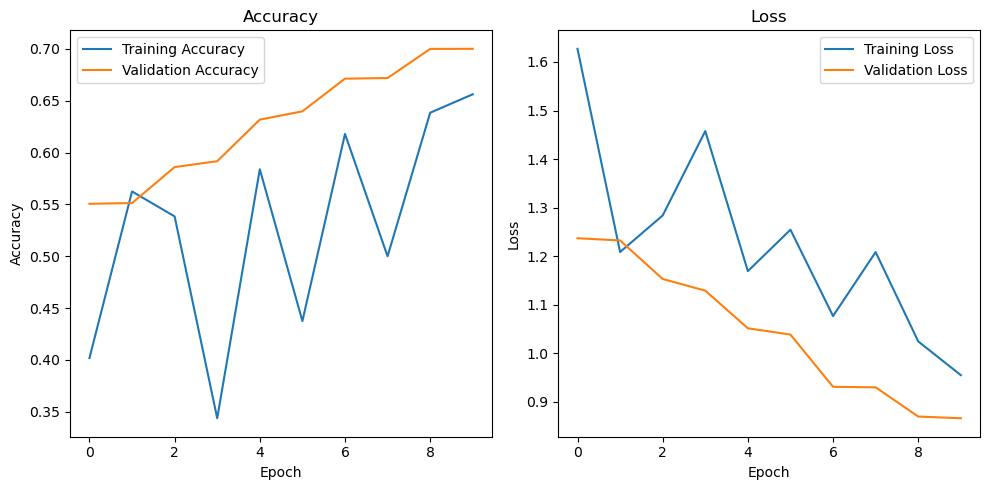